In [1]:
require(data.table)
require(cowplot)
require(ggplot2)
require(scattermore)
require(pbapply)
pboptions(type="timer")

Loading required package: data.table

Loading required package: cowplot

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: ggplot2

Loading required package: scattermore

Loading required package: pbapply



In [2]:
root_path = "/mnt/data/Imaging/202105-Deconwolf/data_210726"

In [3]:
dots_data = readRDS(file.path(root_path, "dots_data.rds"))

In [4]:
dots_data2 = dots_data[is.finite(SNR2) & SNR2 > 0 & Value2 > 0]

In [5]:
pdata = dots_data2[FWHM >= .5 & FWHM <= 5 & nid > 0][1 == series_id]

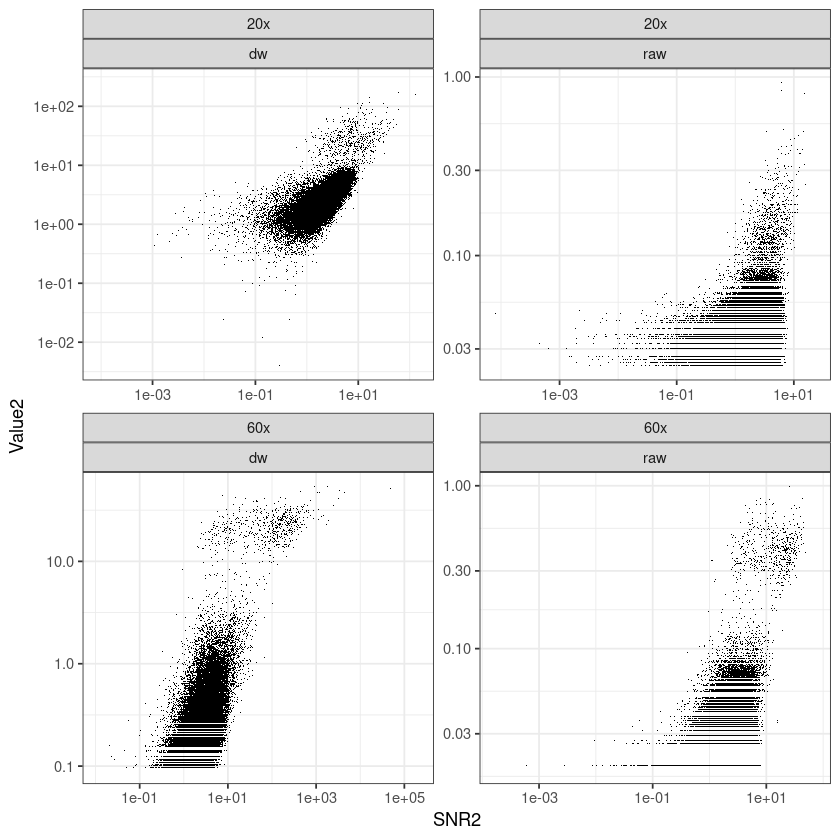

In [6]:
ggplot(pdata, aes(x=SNR2, y=Value2)) + geom_scattermore() +
    facet_wrap(~magnification~image_type, scales="free") +
    scale_y_log10() + scale_x_log10() + theme_bw()

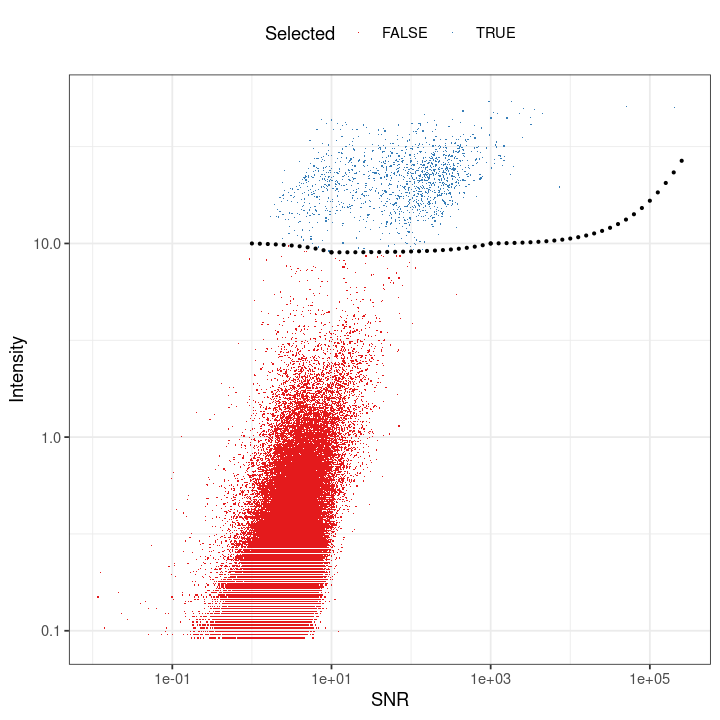

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
extremes = rbindlist(list(
    data.table(x=1, xend=10, y=10, yend=9),    # Value = -1/9 SNR + 91/9
    data.table(x=1e1, xend=1e3, y=9, yend=10), # Value = 1/990 SNR + 890/99
    data.table(x=1e3, xend=3e5, y=10, yend=30) # Value = 2/2900 SNR + 270/29
))
lines = extremes[, .(slope=(yend-y)/(xend-x), intercept=(-x*(yend-y)/(xend-x)+y))]

ppdata1 = pdata["60x" == magnification & "dw" == image_type]
ppdata1[, selected := FALSE]
ppdata1[SNR2 >= 1 & SNR2 <= 10 & Value2 >= (lines[1, slope] * SNR2 + lines[1, intercept]), selected := TRUE]
ppdata1[SNR2 >= 1e1 & SNR2 <= 1e3 & Value2 >= (lines[2, slope] * SNR2 + lines[2, intercept]), selected := TRUE]
ppdata1[SNR2 >= 1e3 & SNR2 <= 3e5 & Value2 >= (lines[3, slope] * SNR2 + lines[3, intercept]), selected := TRUE]

segments = rbindlist(lapply(1:nrow(lines),
    function(i) {
        xx = seq(log10(extremes[i, x]), log10(extremes[i, xend]), by=.1)
        data.table(
            x = 10**xx,
            y = lines[i, slope] * 10**xx + lines[i, intercept],
            segment_id = i
        )
    }
))

ggplot(ppdata1, aes(x=SNR2, y=Value2)) +
    geom_point(aes(color=selected), pch=".") +
    geom_point(data=segments, aes(x=x, y=y), color="black", size=.5) +
    scale_y_log10() + scale_x_log10() + theme_bw() +
    scale_color_brewer(palette="Set1") + labs(x="SNR", y="Intensity") +
    theme(legend.position="top") + guides(color=guide_legend("Selected"))

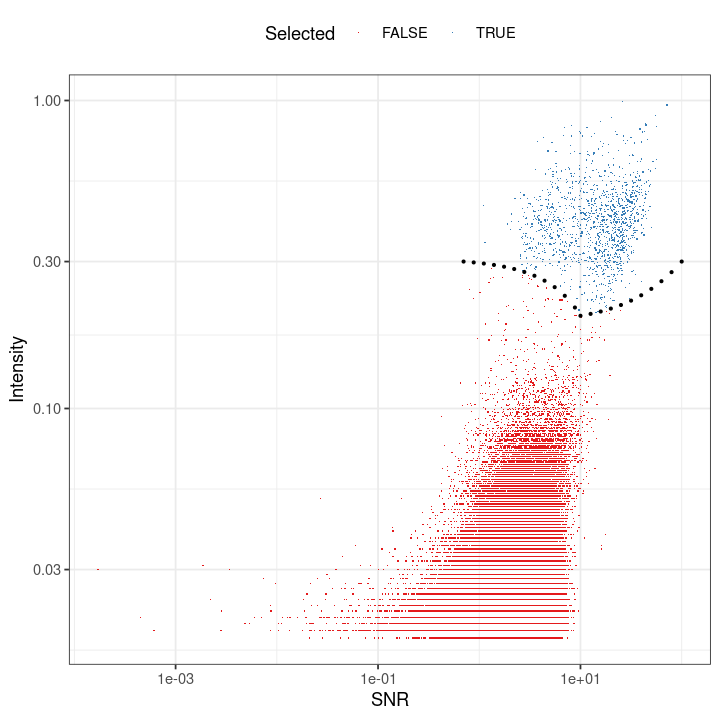

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
extremes = rbindlist(list(
    data.table(x=.7, xend=10, y=.3, yend=.2),    # Value = -1/93 SNR + 979/930
    data.table(x=10, xend=1e2, y=.2, yend=.3)    # Value = 1/900 SNR + 17/90
))
lines = extremes[, .(slope=(yend-y)/(xend-x), intercept=(-x*(yend-y)/(xend-x)+y))]

ppdata2 = pdata["60x" == magnification & "raw" == image_type]
ppdata2[, selected := FALSE]
ppdata2[SNR2 >= .7 & SNR2 <= 10 & Value2 >= (lines[1, slope] * SNR2 + lines[1, intercept]), selected := TRUE]
ppdata2[SNR2 >= 10 & SNR2 <= 1e2 & Value2 >= (lines[2, slope] * SNR2 + lines[2, intercept]), selected := TRUE]

segments = rbindlist(lapply(1:nrow(lines),
    function(i) {
        xx = seq(log10(extremes[i, x]), log10(extremes[i, xend]), by=.1)
        data.table(
            x = 10**xx,
            y = lines[i, slope] * 10**xx + lines[i, intercept],
            segment_id = i
        )
    }
))

ggplot(ppdata2, aes(x=SNR2, y=Value2)) +
    geom_point(aes(color=selected), pch=".") +
    geom_point(data=segments, aes(x=x, y=y), color="black", size=.5) +
    scale_y_log10() + scale_x_log10() + theme_bw() +
    scale_color_brewer(palette="Set1") + labs(x="SNR", y="Intensity") +
    theme(legend.position="top") + guides(color=guide_legend("Selected"))

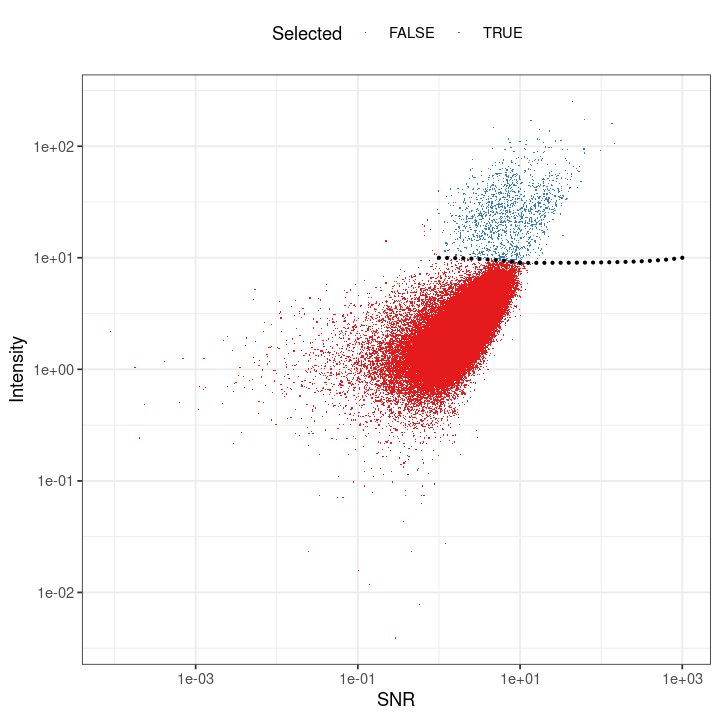

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
extremes = rbindlist(list(
    data.table(x=1, xend=10, y=10, yend=9),    # Value = -1/9 SNR + 91/9
    data.table(x=1e1, xend=1e3, y=9, yend=10)  # Value = 1/990 SNR + 890/99
))
lines = extremes[, .(slope=(yend-y)/(xend-x), intercept=(-x*(yend-y)/(xend-x)+y))]

ppdata3 = pdata["20x" == magnification & "dw" == image_type]
ppdata3[, selected := FALSE]
ppdata3[SNR2 >= 1 & SNR2 <= 10 & Value2 >= (lines[1, slope] * SNR2 + lines[1, intercept]), selected := TRUE]
ppdata3[SNR2 >= 1e1 & SNR2 <= 1e3 & Value2 >= (lines[2, slope] * SNR2 + lines[2, intercept]), selected := TRUE]
ppdata3[SNR2 >= 1e3 & SNR2 <= 3e5 & Value2 >= (lines[3, slope] * SNR2 + lines[3, intercept]), selected := TRUE]

segments = rbindlist(lapply(1:nrow(lines),
    function(i) {
        xx = seq(log10(extremes[i, x]), log10(extremes[i, xend]), by=.1)
        data.table(
            x = 10**xx,
            y = lines[i, slope] * 10**xx + lines[i, intercept],
            segment_id = i
        )
    }
))

ggplot(ppdata3, aes(x=SNR2, y=Value2)) +
    geom_point(aes(color=selected), pch=".") +
    geom_point(data=segments, aes(x=x, y=y), color="black", size=.5) +
    scale_y_log10() + scale_x_log10() + theme_bw() +
    scale_color_brewer(palette="Set1") + labs(x="SNR", y="Intensity") +
    theme(legend.position="top") + guides(color=guide_legend("Selected"))

In [10]:
selected_dots = rbindlist(list(ppdata1, ppdata2, ppdata3))[(selected)][0 < nid]

In [11]:
fwrite(selected_dots, "field_001.gated_dots.tsv", sep="\t")